## Observations and Insights 

Observation_1: Two drug regimens, Capomulin and Ramicane, are more promising than other therapies, becuase their mean values of the tumor size are significantly smaller than that of others. The IQR and box plot analyses show the same conclusion.

Observation_2: The numbers of female and male mouse employed in the experiments are almost equal. The numbers of mouse for each drug regimen are similar. These make the analysis reasonable.

Observation_3: Based on the scatter plot of "Mouse weight vs. Avg. Tumor Volume", I found that the mouse with a larger weight are more likely to have tumors with a larger volume.

Observation_4: For an effective drug like Capomulin, the volume of the tumor shrunk along time. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

# Combine the data into a single dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# pd.Merge to realize data combiantion 
newdata = pd.merge(mouse_metadata,study_results,on='Mouse ID').head(2000)
newdata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
#Remove duplicated data by selected regions
data=newdata.drop_duplicates(subset=['Drug Regimen','Sex','Age_months','Weight (g)','Timepoint'])
data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the DataFrame.
number_of_mice=len(data['Mouse ID'].unique())
number_of_mice

242

In [18]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find duplicated data
dupdata=newdata[newdata.duplicated(subset=['Drug Regimen','Sex','Age_months','Weight (g)','Timepoint'])==True]

dupID = dupdata["Mouse ID"].unique()
dupID
dupdf=pd.DataFrame({"Duplicate Mouse ID":dupID})
dupdf

# I dont understand why the g989 was included here, because I didnt see any duplicates in the raw data file. But this is the result.

,Duplicate Mouse ID
0,z578
1,d133
2,f345
3,g989
4,k804
5,r850
6,s121
7,v409


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupdata=newdata[newdata.duplicated(subset=['Drug Regimen','Sex','Age_months','Weight (g)','Timepoint'])==True]
dupdata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
485,k804,Infubinol,Female,23,29,0,45.000000,0
486,k804,Infubinol,Female,23,29,5,48.266204,0
487,k804,Infubinol,Female,23,29,10,49.471244,0
488,k804,Infubinol,Female,23,29,15,50.477618,0
489,k804,Infubinol,Female,23,29,20,54.484519,0
490,k804,Infubinol,Female,23,29,25,55.674808,1
491,k804,Infubinol,Female,23,29,30,59.240615,2
492,k804,Infubinol,Female,23,29,35,62.117279,2
568,f345,Infubinol,Male,23,26,0,45.000000,0
569,f345,Infubinol,Male,23,26,5,45.591147,0


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_lst = dupdata["Mouse ID"].unique()

ind=newdata[newdata['Mouse ID'].isin(duplicate_lst)].index

data_two=newdata.drop(ind)
data_two

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_two=len(data_two['Mouse ID'].unique())
number_of_mice_two

# 241 is becuase the Mouse g989 was counted as a duplicate.

241

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

stat=data.groupby(['Drug Regimen'])

Vmean=stat['Tumor Volume (mm3)'].mean().round(2)
Vmedian=stat['Tumor Volume (mm3)'].median().round(2)
Vvariance=stat['Tumor Volume (mm3)'].var().round(2)
Vstdev=stat['Tumor Volume (mm3)'].std().round(2)
Vsem=stat['Tumor Volume (mm3)'].sem().round(2)

frame1=[Vmean,Vmedian,Vvariance,Vstdev,Vsem]
Stat_df = pd.concat(frame1,axis=1)

Stat_df.columns = ['Mean','Median','Variance','Standard deviation','SEM']
Stat_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,53.06,51.84,45.50,6.75,0.54
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.30,52.63,61.65,7.85,0.60
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.30,40.77,23.67,4.86,0.33
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

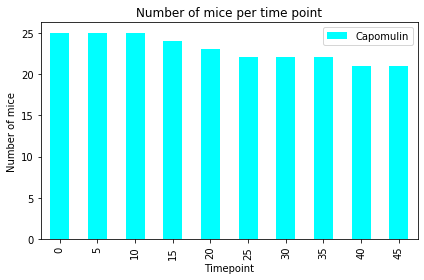

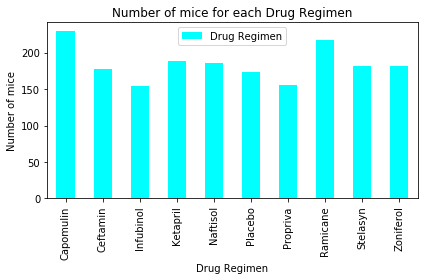

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

# Since the data contains 10 drugs and 10 time points for each drug. 
# I dont think it is reasonable to plot a chat haing ~100 columns, which is not readable for readers.
# Therefore I just show the code for one of the drug. The rest is the same.
# Perhaps the question is asking the number of mice for each treatment. The result is also shown below.


# the number of mice per time point for each treatment (Pandas)

capomulin=data[data['Drug Regimen'] == 'Capomulin']

timepoint_group=capomulin.groupby('Timepoint')

count_capomulin=pd.DataFrame(timepoint_group['Drug Regimen'].count())

count_capomulin

bar_capomulin = count_capomulin.plot(kind='bar', title="Number of mice per time point", color="cyan")


bar_capomulin.set_xlabel('Timepoint')
bar_capomulin.set_ylabel('Number of mice')
bar_capomulin.legend(['Capomulin'])

plt.tight_layout()
plt.show()



# the number of mice for each treatment (Pandas)

drug_count = pd.DataFrame(stat['Drug Regimen'].count())

countbar = drug_count.plot(kind='bar', title="Number of mice for each Drug Regimen", color="cyan")

countbar.set_xlabel('Drug Regimen')
countbar.set_ylabel('Number of mice')
countbar.legend(['Drug Regimen'])

plt.tight_layout()
plt.show()

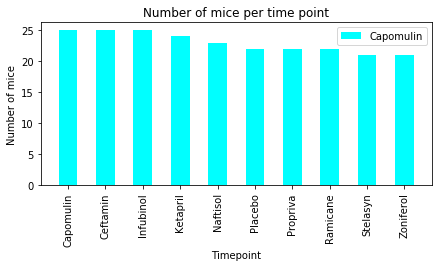

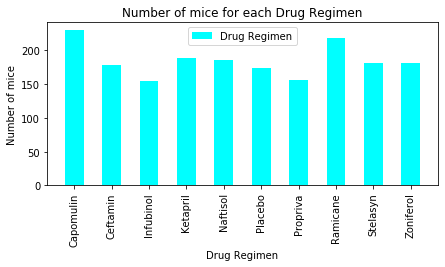

In [15]:
# the number of mice per time point for each treatment (Pyplot)

x_axis = np.arange(len(count_capomulin))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(7,3))
plt.bar(x_axis, count_capomulin["Drug Regimen"], color='cyan', align="center",width=0.5)
plt.xticks(tick_locations, list(drug_count.index), rotation="vertical")

plt.title('Number of mice per time point')
plt.xlabel('Timepoint')
plt.ylabel('Number of mice')
column_name = ["Capomulin"]

plt.legend(column_name,loc="upper right")
plt.show()




# the number of mice for each treatment (Pyplot)

x_axis = np.arange(len(drug_count))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(7,3))
plt.bar(x_axis, drug_count["Drug Regimen"], color='cyan', align="center",width=0.5)
plt.xticks(tick_locations, list(drug_count.index), rotation="vertical")

plt.title('Number of mice for each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of mice')
column_name = ["Drug Regimen"]

plt.legend(column_name,loc="upper center")
plt.show()


## Pie Plots

Female    122
Male      120
Name: Sex, dtype: int64


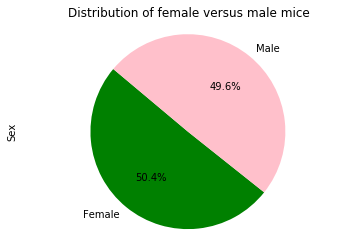

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using plt:
gendata=data.drop_duplicates(subset=['Mouse ID'])

micegender=gendata['Sex'].value_counts()
print(micegender)

gender= list(micegender.index.values)
color=['green','pink']
explode=(0,0)

plt.pie(micegender,explode=explode,labels=gender,colors=color,autopct="%1.1f%%",startangle=140)

plt.title('Distribution of female versus male mice')
plt.rcParams['font.size'] = 14
plt.ylabel('Sex')
plt.axis('equal')
plt.show()



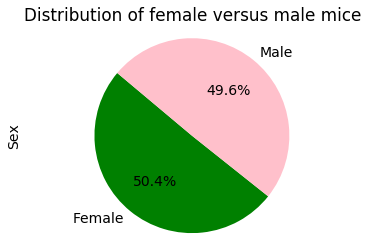

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

micegender.plot(kind='pie',y='size',
                title="Distribution of female versus male mice",startangle=140,
                autopct='%1.1f%%',fontsize=14,colors =["green","pink"],legend =False)

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [333]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

drug_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_data=data[data['Drug Regimen'].isin(drug_list)]

idx = drug_data.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].transform(max)==drug_data['Timepoint']
dataQ=drug_data[idx]
dataQ


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,s710,Capomulin,Female,1,23,45,40.728578,1
19,i557,Capomulin,Female,1,24,45,47.685963,1
29,s185,Capomulin,Female,3,17,45,23.343598,1
39,m957,Capomulin,Female,3,19,45,33.329098,1
49,j119,Capomulin,Female,7,23,45,38.125164,1
...,...,...,...,...,...,...,...,...
1495,m546,Ramicane,Male,18,16,45,30.564625,1
1505,u196,Ramicane,Male,18,25,45,40.667713,3
1509,y449,Ramicane,Male,19,24,15,44.183451,0
1519,q597,Ramicane,Male,20,25,45,45.220869,2


In [350]:
## Calculate the IQR
q1_capo = dataQ[dataQ['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)'].quantile(0.25)
q3_capo = dataQ[dataQ['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)'].quantile(0.75)
IQR_capo = q3_capo-q1_capo

q1_ceft = dataQ[dataQ['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)'].quantile(0.25)
q3_ceft = dataQ[dataQ['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)'].quantile(0.75)
IQR_ceft = q3_ceft-q1_ceft

q1_infu = dataQ[dataQ['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)'].quantile(0.25)
q3_infu = dataQ[dataQ['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)'].quantile(0.75)
IQR_infu = q3_infu-q1_infu

q1_rami = dataQ[dataQ['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)'].quantile(0.25)
q3_rami = dataQ[dataQ['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)'].quantile(0.75)
IQR_rami = q3_rami-q1_rami


def IQR(data,drug_name):
    q1_ = data[data['Drug Regimen']==drug_name]['Tumor Volume (mm3)'].quantile(0.25)
    q3_ = data[data['Drug Regimen']==drug_name]['Tumor Volume (mm3)'].quantile(0.75)
    IQR_ = q3_ - q1_
    ## determine if there are any outliers
    max_ = q3_ +1.5*IQR_
    min_ = q1_ -1.5*IQR_
    print('IDR in '+drug_name+'is:%.2f'%IQR_)
    if data[data['Drug Regimen']==drug_name]['Tumor Volume (mm3)'].max()>max_ or data[data['Drug Regimen']==drug_name]['Tumor Volume (mm3)'].min()<min_:
        print('!!!')
    else:
        print('There is no outlier in'+drug_name+'\n*******************************')
for drug_name in drug_list:
    IQR(dataQ,drug_name)

IDR in Capomulinis:7.78
There is no outlier inCapomulin
*******************************
IDR in Ramicaneis:8.04
There is no outlier inRamicane
*******************************
IDR in Infubinolis:13.77
There is no outlier inInfubinol
*******************************
IDR in Ceftaminis:15.58
There is no outlier inCeftamin
*******************************


Text(0, 0.5, 'Average tumor volume (mm3)')

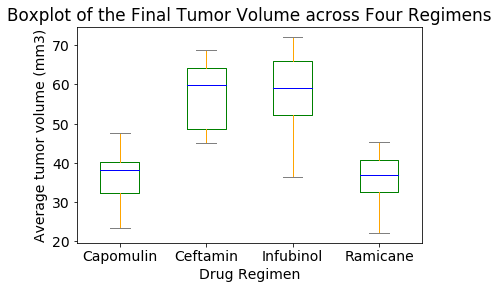

In [346]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
## Box plot
props = dict(boxes="green", whiskers="orange", medians="blue", caps="gray")

boxQ=dataQ.boxplot(color=props,by ='Drug Regimen', column =['Tumor Volume (mm3)'], grid = False)

plt.title('Boxplot of the Final Tumor Volume across Four Regimens')

plt.suptitle('')

plt.ylabel("Average tumor volume (mm3)")


## Line and Scatter Plots

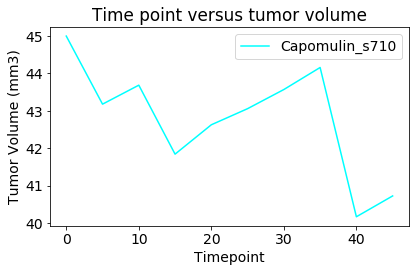

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
single_mouse=data[data['Mouse ID'] == 's710']
single_mouse_idx=single_mouse.set_index('Timepoint')
single = pd.DataFrame(single_mouse_idx['Tumor Volume (mm3)'])

single_line=single.plot(kind='line',title="Time point versus tumor volume", color="cyan")

single_line.set_xlabel('Timepoint')
single_line.set_ylabel('Tumor Volume (mm3)')
single_line.legend(['Capomulin_s710'])

plt.tight_layout()
plt.show()


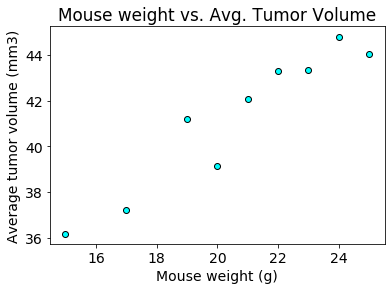

In [299]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin=data[data['Drug Regimen']=='Capomulin']

vol_by_weight=capomulin.groupby(['Weight (g)'])

V_weight=vol_by_weight['Weight (g)'].mean().round(2)
V_average=vol_by_weight['Tumor Volume (mm3)'].mean().round(2)

frame2=[V_weight,V_average]
scatter_vol=pd.concat(frame2,axis=1)

plt.scatter(V_weight,V_average,marker='o',facecolors='cyan',edgecolors='black',alpha=1)

plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Average tumor volume (mm3)")

plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [302]:
# correlation coefficient
correlation=st.pearsonr(V_weight,V_average)
print('Correlation coefficient:',round(correlation[0],2))

Correlation coefficient:  0.95


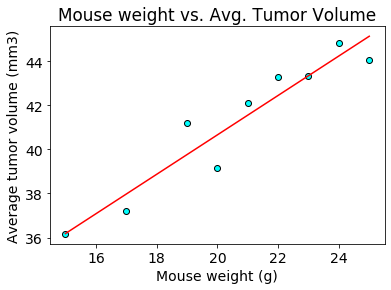

Line regression equation: y = 0.8952 x + 22.7549
R2: 0.950468


In [326]:
# line equation
from scipy.stats import linregress

(slope,intercept,rvalue,pvalue,stderr)=linregress(V_weight,V_average)
regress_values=slope*V_weight+intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq='y = {str(round(slope,2))}x + {str(round(intercept,2))}'

plt.scatter(V_weight,V_average,marker='o',facecolors='cyan',edgecolors='black',alpha=1)
plt.plot(V_weight,regress_values,"r-")

plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Average tumor volume (mm3)")

plt.show()

print('Line regression equation:','y =',slope.round(4),'x +',intercept.round(4))
print('R2:', rvalue.round(6))